### 이상치 데이터 처리
- 피쳐/특성에 데이터 값의 범위를 벗어나는 데이터를 의미
- 종류 : 잘못 입력된 경우, 자연으로 생성된 데이터
    * 잘못 입력된 데이터 : 입력 시 오타 ==> 제거 또는 대체
    * 자연 생성 데이터 : 연봉, 키, 몸무게, 나이 ==> 분리해서 전용 모델 / 식별용 피쳐
- 탐지
    * 시각화 확인
    * 데이터의 분포를 확인 : Z-score / IQR(Turkey Fences)
- 처리
    * 삭제 / 대체 / 분리 모델 / 파생변수 추가

(1) 모듈 로딩 및 데이터 준비

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# 임의의 데이터
dataDF = pd.DataFrame({'num':[1,4,3,2,4,5,-14,2,1,15]})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


(2) 데이터 전처리

(2-1) 데이터 확인

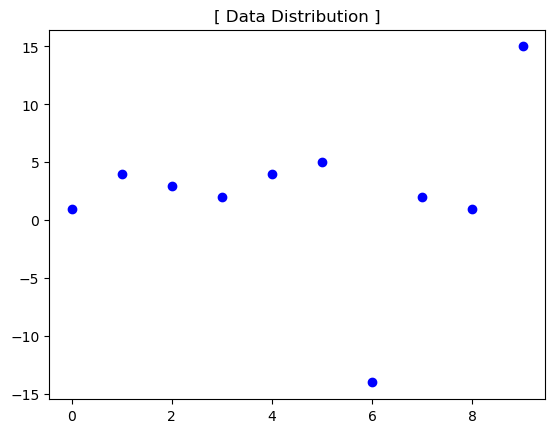

In [64]:
# 시각화로 데이터 분포 확인
plt.plot(dataDF, 'bo')
plt.title('[ Data Distribution ]')
plt.show()

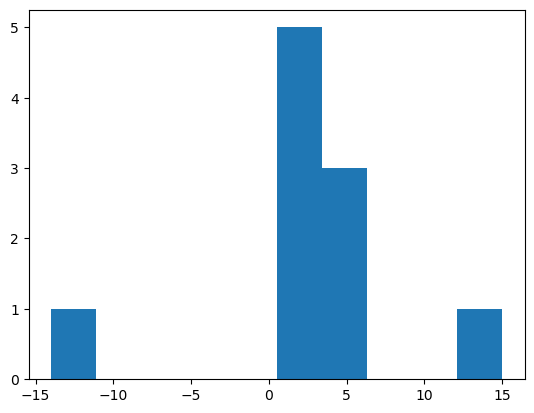

In [65]:
plt.hist(dataDF)
plt.show()

(2-2) 불필요 데이터 체크 => 결측치, 이상치

In [66]:
# 결측치
dataDF.isnull().sum()

num    0
dtype: int64

In [67]:
# 이상치 탐지 - 방법(1) 평균과 편차를 이용한 탐지 Z-score
# Z-score = 데이터 - 평균/표준편차
mean_value = dataDF.mean()
std_value = dataDF.std()

z_data = (dataDF - mean_value) / std_value
z_data

,num
0,-0.185065
1,0.242008
2,0.099650
3,-0.042707
4,0.242008
5,0.384366
6,-2.320430
7,-0.042707
8,-0.185065
9,1.807942


In [68]:
# 양끝단 제거를 위한 기준값 => 1.0
base = 1.0
mask = z_data.abs() > 1.0
mask

,num
0,False
1,False
2,False
3,False
4,False
5,False
6,True
7,False
8,False
9,True


In [69]:
dataDF[~mask]

,num
0,1.0
1,4.0
2,3.0
3,2.0
4,4.0
5,5.0
6,NaN
7,2.0
8,1.0
9,NaN


In [70]:
z_dataDF = dataDF[~mask].dropna()
z_dataDF

,num
0,1.0
1,4.0
2,3.0
3,2.0
4,4.0
5,5.0
7,2.0
8,1.0


In [71]:
# 이상치 탐지 - 방법(2) 데이터를 4등분해서 가운데 데이터를 기준으로 이상치 탐지
q1 = dataDF.quantile(0.25)
q3 = dataDF.quantile(0.75)
iqr = q3-q1

# 이상치로 판단할 기준되는 값
lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)

print(f'q1:{q1}\nq3:{q3}\niqr:{iqr}')
print(f'lower:{lower}\nupper:{upper}')

q1:num    1.25
Name: 0.25, dtype: float64
q3:num    4.0
Name: 0.75, dtype: float64
iqr:num    2.75
dtype: float64
lower:num   -2.875
dtype: float64
upper:num    8.125
dtype: float64


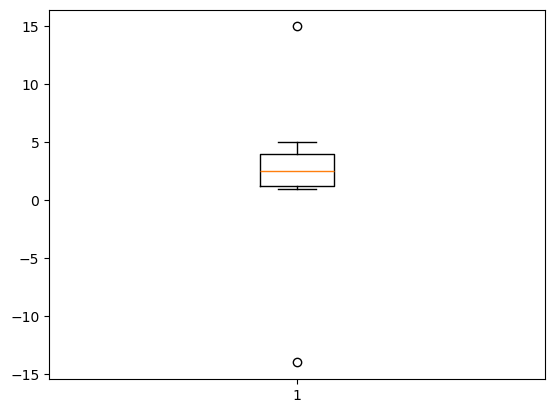

In [72]:
# 시각화
bp_obj = plt.boxplot(dataDF)
plt.show()

In [73]:
dataDF<lower

,num
0,False
1,False
2,False
3,False
4,False
5,False
6,True
7,False
8,False
9,False


In [74]:
dataDF>upper

,num
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,True


In [75]:
bp_obj

{'whiskers': [<matplotlib.lines.Line2D at 0x279c30e5580>,
 'caps': [<matplotlib.lines.Line2D at 0x279c30e5ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x279c30e52e0>],
 'medians': [<matplotlib.lines.Line2D at 0x279c30e5ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x279c30f31c0>],
 'means': []}

In [80]:
bp_obj['whiskers']

In [79]:
bp_obj['whiskers'][0].get_ydata(), bp_obj['whiskers'][1].get_ydata()

(array([1.25, 1.  ]), array([4., 5.]))